<center> <img src="pics/logo.jpg">

### <center> __CycleGAN: Image2Image__ <br/> 
<br/><br/>
 <center>  <img src="pics/cycle-gan-paintings.png">

#### <center> Атабек Дулат - *Machine Learning Engineer* в Kolesa Group 
#### <center>  __Гитхаб с презентацией и кодом обучения сетки :__ 
#### <center> https://github.com/carnotaur/CycleGAN

# <center> __План:__
<br/><br/>
##  1. GANs повтор
## 2. Image-to-Image translation
## 3. CycleGAN - в чем фишка?
## 4. Generator
## 5. PatchGAN discriminator
## 6. Training Details
## 7. Limitations of CycleGAN

# <center> Quick tour to GAN

<center>  <img src="pics/gans_basic.png">

## <center> Classical Adversarial Loss
<br>
<center> $ G : X → Y $<br/>
$ D_y  - Discriminator$ <br/><br/>
$L_{GAN} (G, D_Y , X, Y ) = E_{y∼p_{data} (y)} [ log D_Y (y) ]
+ E_{x∼p_{data}(x)} [log(1 − D_Y (G(x))]$

# <center> CycleGAN
<br>
 <center>  <img src="pics/teaser.jpg">

# <center> Cycle Consistency
<center> $G : X → Y $ <br>
<center> $F : Y → X $ <br>
<center> $x → G(x) → F (G(x)) ≈ x$
<center>  <img src="pics/cycle-gan-idea.png">

## <center> Example
<center>  <img src="pics/reconstruction.png">

## <center> Cycle Consistency Loss: <br/>
<center> $L_{cyc} (G, F ) = E_{x∼p_{data}} (x) [||F (G(x)) − x||_1 ]
+ E_{y∼p_{data}} (y) [||G(F (y)) − y||_1 ]$


## <center> Total GAN loss: <br/>
<center> $ L(G, F, D_X , D_Y ) =L_{GAN} (G, D_Y , X, Y ) + L_{GAN} (F, D_X , Y, X)
+ λL_{cyc} (G, F )$

## <center> Hyperparameters:

In [16]:
img_size = 256    # может быть 128
num_epochs = 200
batch_size = 1
lr = 0.0002
alpha, beta = 0.5, 0.9
num_res_blocks = 6 if img_size == 128 else 9

In [ ]:
optimizer_G = torch.optim.Adam(itertools.chain(G_x.parameters(), G_y.parameters()),
                               lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(itertools.chain(D_x.parameters(), D_y.parameters()),
                               lr=lr, betas=(0.5, 0.999))

In [12]:
scheduler_G = torch.optim.lr_scheduler.LambdaLR(optimizer_G, 
                                                lr_lambda=lambda epoch: 0.99 ** epoch)
scheduler_D = torch.optim.lr_scheduler.LambdaLR(optimizer_D, 
                                                lr_lambda=lambda epoch: 0.99 ** epoch)

NameError: name 'torch' is not defined

<center>  <img src="pics/cycleloss-comparison.png">

## <center> Identity Loss
## <center> Используется для сохранения цветов при _Style Transferring_
<center> $L_{identity} (G, F ) = E_{y∼p_{data}(y)}  [||G(y) − y||_1 ] +
E_{x∼p_{data}(x)} [||F (x) − x||_1 ]$

<center>  <img src="pics/identity-loss-comparison.png">

# <center> Generator

<center>  <img src="pics/GeneratorArchitecture.jpg">

!CODE

# <center> Discriminator a.k.a PatchGAN

<center>  <img src="pics/pathcgan.png">

<center>  <img src="pics/discriminator.jpg">

!CODE

# <center> Training Details
*Training GANs consists in finding a Nash equilibrium to a two-player non-cooperative game. […] Unfortunately, finding Nash equilibria is a very difficult problem.*
    
 

### <center/>Adversarial Loss for CycleGAN: </center>  <br/>
for Generator: <br/>
<center/> $min \hspace{0.25cm} E_{x∼p_{data (x)}} [(D(G(x)) − 1) ^ 2 ]$ </center> 
<br/>
for Discriminator: <br/>
<center/> $min \hspace{0.25cm} E_{y∼p data (y)} [(D(y) − 1)^2 ] + E_{x∼p data (x)}  [D(G(x))^2 ]$</center>

# <center> GAN Failures

<center>  <img src="pics/GAN-faliures.png">

# <center>  Reasons
 1. No spatial transformations
 2. PatchGAN
 3. !!!

# Links:
1. https://junyanz.github.io/CycleGAN/
2. https://hardikbansal.github.io/CycleGANBlog/ 
3. 
4. 

Спасибо за просмотр!!!


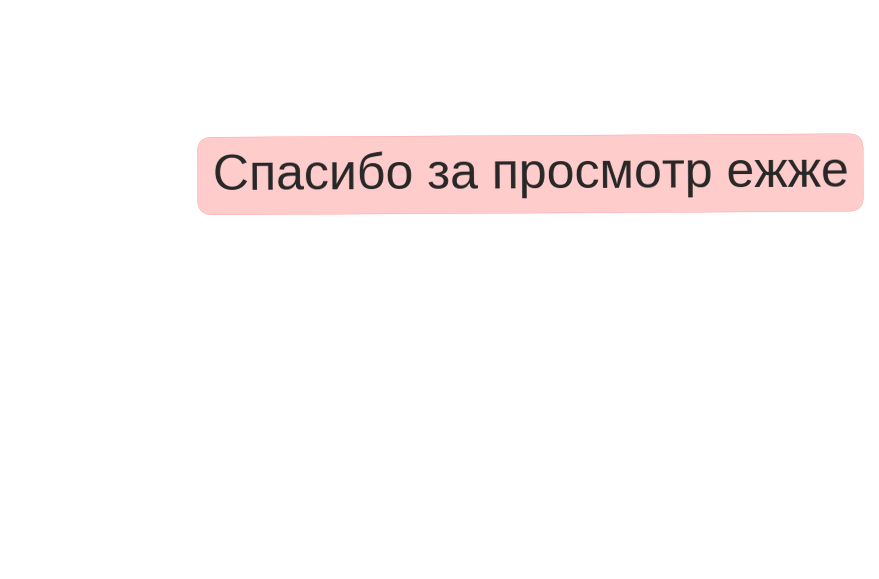

In [23]:
from Thanks import MakeThanks
MakeThanks.show_thanks()